# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Load the Dataset

In [2]:
dataset_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (617, 58)


The data is composed of 58 columns and 617 entries. We can see all 58 dimensions(results will be truncated since the number of columns is big) of our dataset by printing out the first 5 entries using the following code:

In [3]:
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


`Class` is the label column indicating if a person has one or more of any of the three medical conditions (i.e,`Class 1`), or none of the three medical conditions (i.e,`Class 0`).
Given the features of the dataset, the goal of our model is to predict the value of `Class` for any person.

# Quick basic dataset exploration

In [4]:
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [5]:
dataset_df.isnull().values.any()

True

In [6]:
dataset_df.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

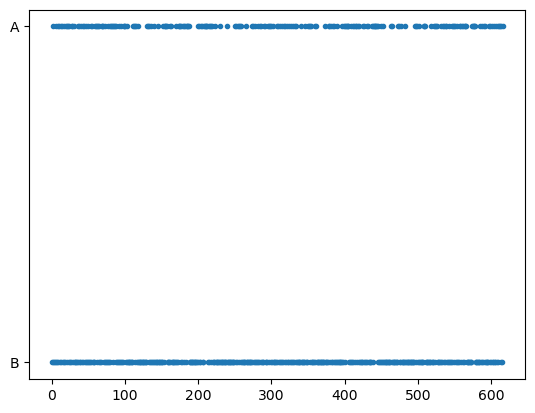

In [8]:
plt.plot(dataset_df["EJ"], '.')

## Pie chart for label column: Class

<Axes: ylabel='Class'>

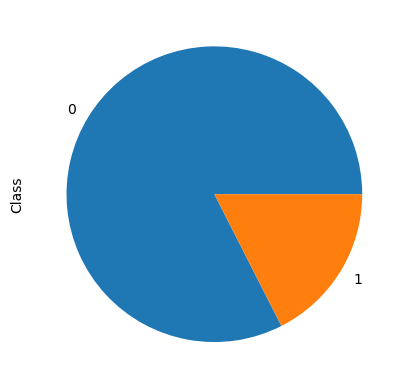

In [9]:
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="pie")

**Important**: From the pie chart we can see that the dataset is heavily imbalanced since the fraction of positive(`1`) samples is very small compared to the negative(`0`) samples.

# Numerical data distribution

First, we will list all the numerical columns names.

In [10]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id", "EJ", "Class"]]

Let us now plot the first 6 numerical columns and their values using bar charts.

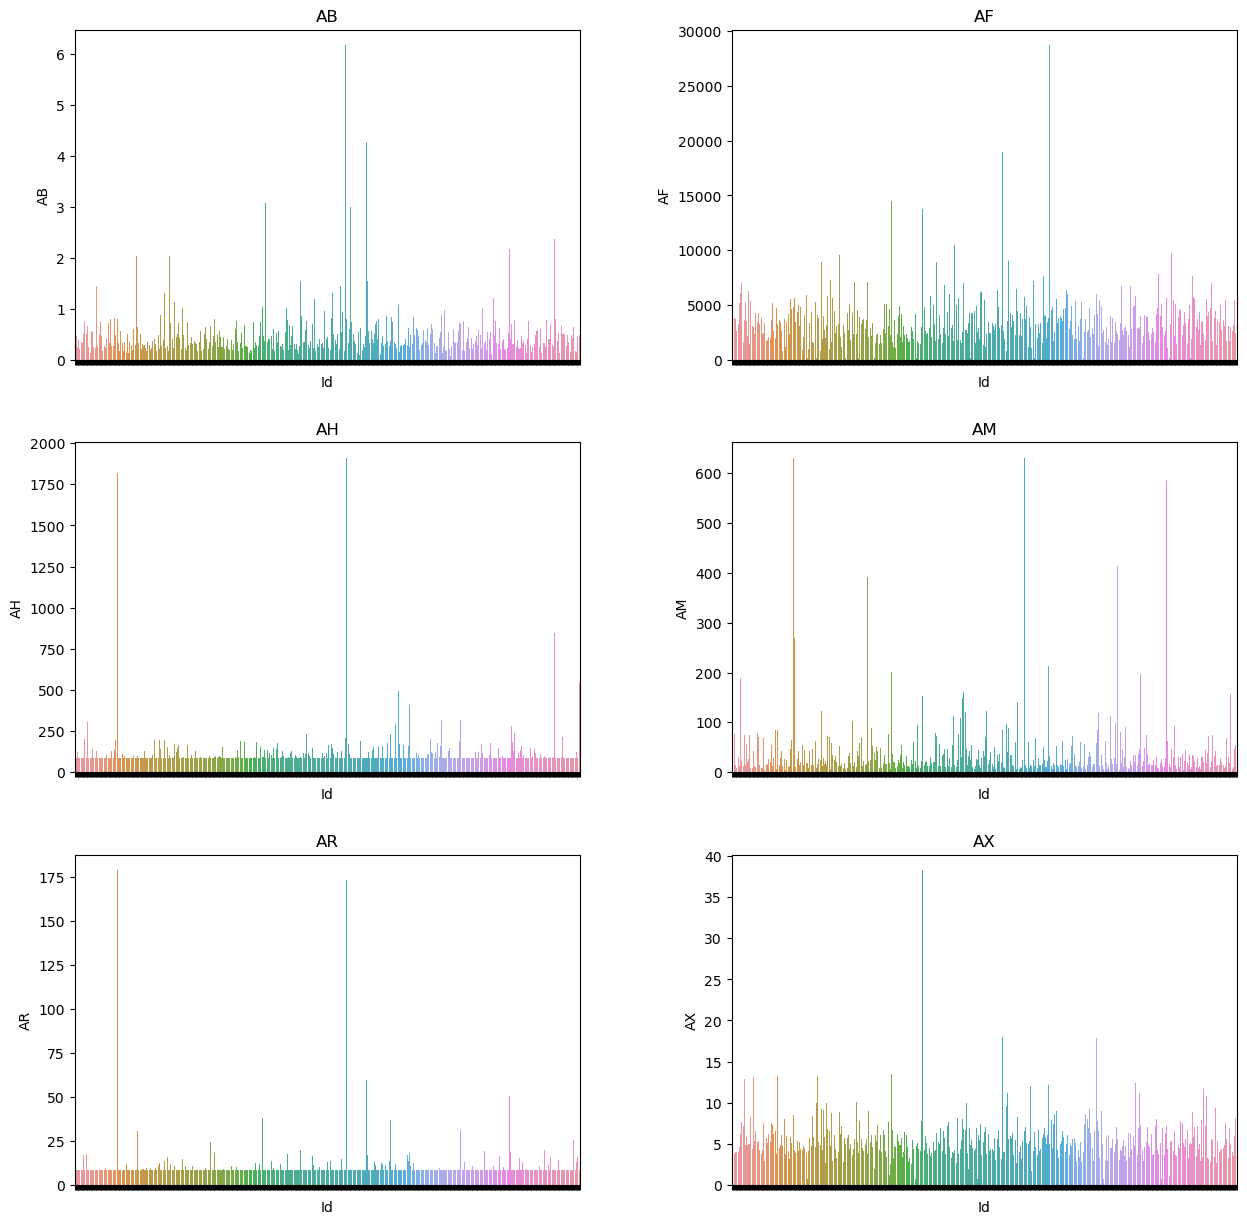

In [11]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df['Id'], y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)

We will also create a list of feature columns that will be used for training. We will drop `Id` from the list since it is not needed.

In [12]:
FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id"]]

Now let us create the data matrix and prediction vector:

X_train = np.array(dataset_df[dataset_df.columns[1:13]])
X_train = np.append(X_train, dataset_df[dataset_df.columns[14:16]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[18:33]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[34:40]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[42:44]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[45:48]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[49:50]], axis = 1)
X_train = np.append(X_train, dataset_df[dataset_df.columns[51:56]], axis = 1)
y_train = np.array(dataset_df["Class"])

X_train.shape, y_train.shape

In [13]:
X_train = np.array(dataset_df[dataset_df.columns[1:40]])
X_train = np.append(X_train, dataset_df[dataset_df.columns[41:57]], axis = 1)
y_train = np.array(dataset_df["Class"])

In [14]:
data_cleaner = SimpleImputer(strategy = "median")
X_train = data_cleaner.fit_transform(X_train)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [16]:
feature_transformer = PCA()
X_train = feature_transformer.fit_transform(X_train)

0.7235962721135529

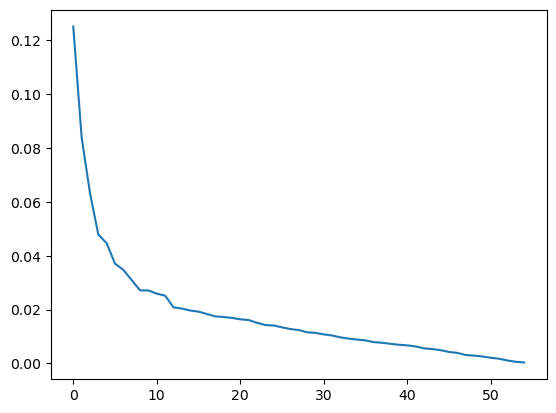

In [17]:
plt.plot(feature_transformer.explained_variance_ratio_)
np.sum(feature_transformer.explained_variance_ratio_[:20])

In [18]:
feature_transformer.n_components_, feature_transformer.n_features_, feature_transformer.n_samples_, feature_transformer.n_features_in_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


(55, 55, 617, 55)

In [19]:
X_train.shape

(617, 55)

In [20]:
X_train = X_train[:, :20]
X_train.shape

(617, 20)

In [21]:
model = MLPClassifier(max_iter = 100000, tol = 1e-8)
#model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier(max_iter=100000, tol=1e-08)

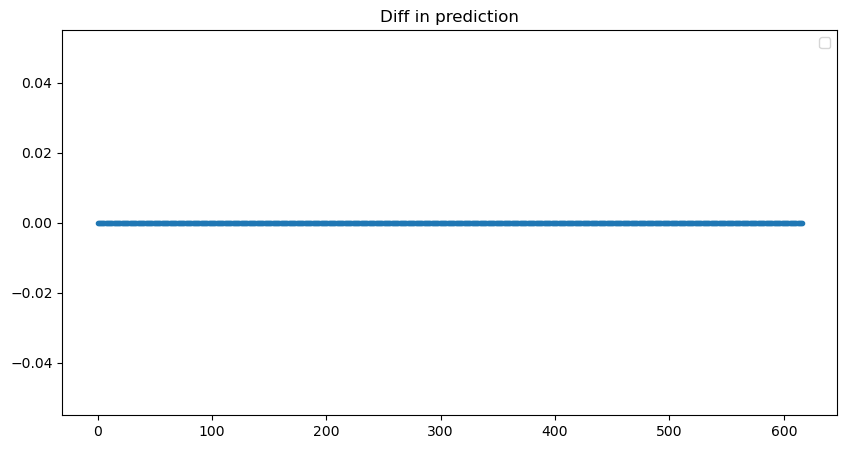

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(np.abs(y_train - model.predict(X_train)), '.')
ax.set_title("Diff in prediction")
plt.legend()
plt.show()

Let's find the competition score on the training set

In [23]:
N0 = np.sum(y_train == 0)
N1 = np.sum(y_train == 1)
N0, N1

(509, 108)

In [24]:
predictions_train = model.predict_proba(X_train)
predictions_train

array([[8.99545880e-05, 9.99910045e-01],
       [9.99999245e-01, 7.55469185e-07],
       [9.99730839e-01, 2.69161026e-04],
       ...,
       [1.00000000e+00, 9.22844230e-15],
       [9.99992828e-01, 7.17243440e-06],
       [1.00000000e+00, 1.05120647e-27]])

In [25]:
score = 0
epsilon = 10 ** -15

for i in range(len(y_train)):
    if y_train[i] == 0:
        p = max(min(predictions_train[i][0], 1.0 - epsilon), epsilon)
        score -= np.log(p) / N0
    else:
        p = max(min(predictions_train[i][1], 1.0 - epsilon), epsilon)
        score -= np.log(p) / N1

score /= 2
score

7.688651088176037e-05

# Testing

In [26]:
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
test_ds_pd = test_df
test_df_columns = test_ds_pd.columns.tolist()
TEST_FEATURE_COLUMNS = [i for i in FEATURE_COLUMNS \
                        if i in test_df_columns and i != "Class"]
test_ds_pd = test_ds_pd[TEST_FEATURE_COLUMNS]
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


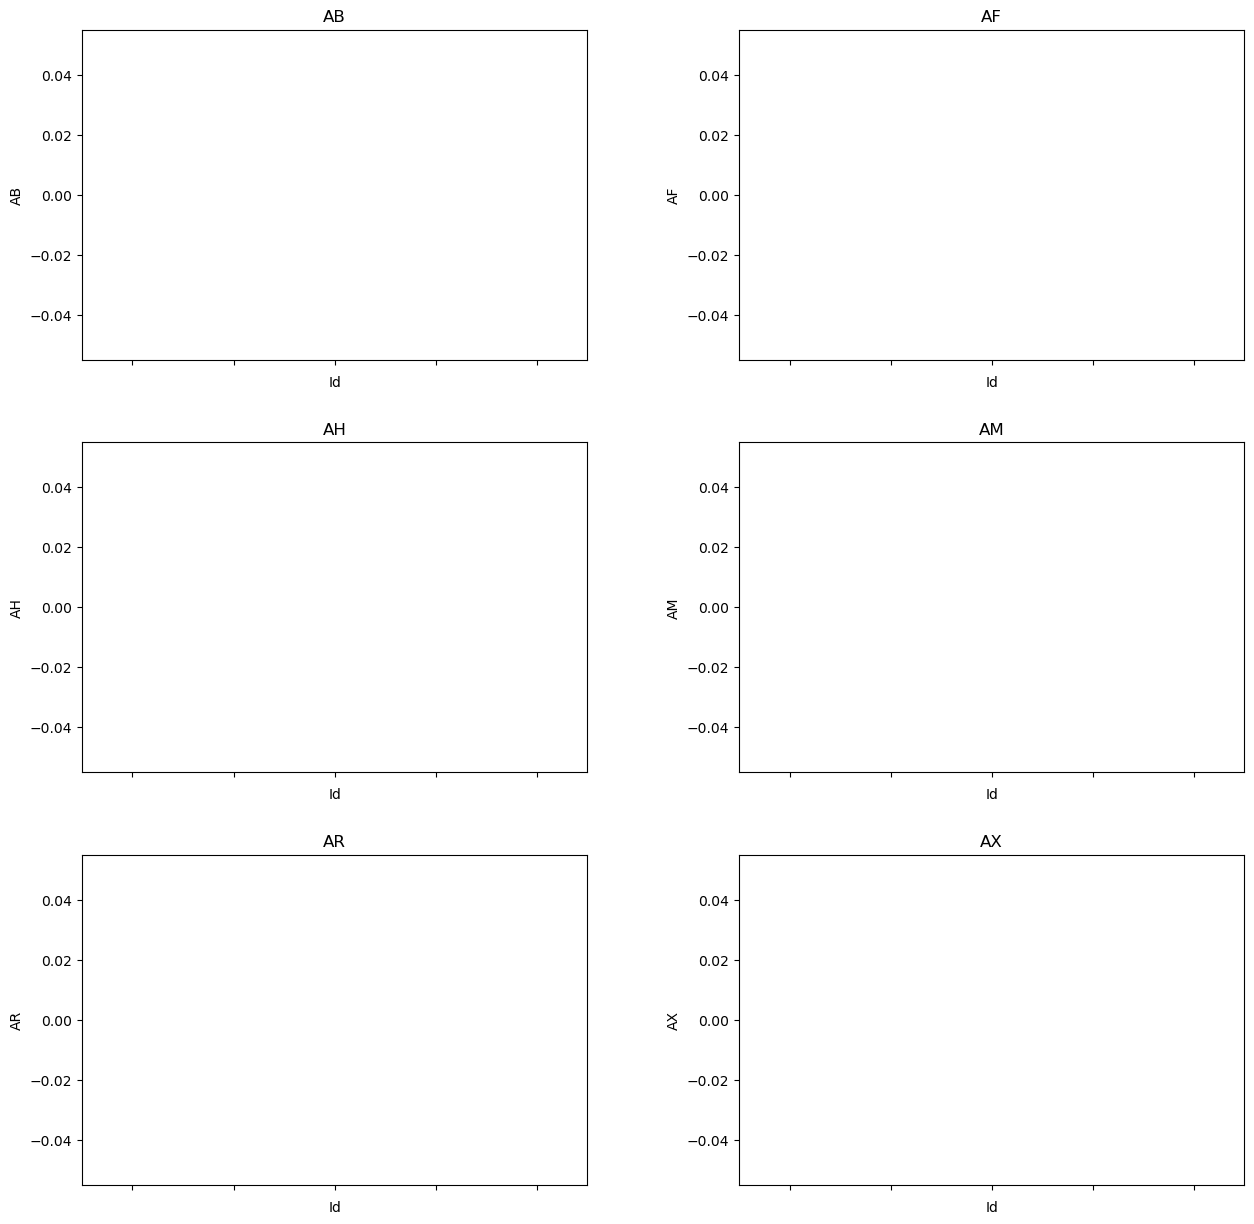

In [27]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=test_df['Id'], y=test_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)

X_test = np.array(test_df[test_df.columns[1:13]])
X_test = np.append(X_test, test_df[test_df.columns[14:16]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[18:33]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[34:40]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[42:44]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[45:48]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[49:50]], axis = 1)
X_test = np.append(X_test, test_df[test_df.columns[51:56]], axis = 1)

In [28]:
X_test = np.array(test_df[test_df.columns[1:40]])
X_test = np.append(X_test, test_df[test_df.columns[41:]], axis = 1)

In [29]:
X_test = data_cleaner.fit_transform(X_test)

In [30]:
X_test = scaler.fit_transform(X_test)

In [31]:
X_test = feature_transformer.transform(X_test)
X_test = X_test[:, :20]

In [32]:
predictions = model.predict_proba(X_test)
print(predictions)

[[0.96026307 0.03973693]
 [0.96026307 0.03973693]
 [0.96026307 0.03973693]
 [0.96026307 0.03973693]
 [0.96026307 0.03973693]]


# Submission

In [33]:
sample_submission = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")
sample_submission[['class_0', 'class_1']] = predictions
sample_submission

,Id,class_0,class_1
0,00eed32682bb,0.960263,0.039737
1,010ebe33f668,0.960263,0.039737
2,02fa521e1838,0.960263,0.039737
3,040e15f562a2,0.960263,0.039737
4,046e85c7cc7f,0.960263,0.039737


In [34]:
sample_submission.to_csv('/kaggle/working/submission.csv', index = False)